In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_120_10degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((13*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(120_10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((13*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(54, 100, 100)


In [17]:
print(y_test.shape)

(24, 100, 100)


In [18]:
print(x_train.shape)

(54, 15, 1)


In [19]:
print(x_test.shape)

(24, 15, 1)


In [20]:
theta_train.shape

(54,)

In [21]:
tsr_train.shape

(54,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((54, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((24, 2, 1))

In [28]:
tsr_theta_train.shape

(54, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 7ms/step - loss: 0.0113 - rmse: 0.1057
Epoch 2/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0113 - rmse: 0.1054
Epoch 3/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.1051
Epoch 4/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.1048
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.1045
Epoch 6/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 7/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.1038
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0108 - rmse: 0.1033
Epoch 9/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1028
Epoch 10/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1022
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0833
Epoch 87/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0833
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0833
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0833
Epoch 90/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0833
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 92/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 93/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 94/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0831
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0831
Epoch 172/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0831
Epoch 173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0831
Epoch 174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0831
Epoch 175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0831
Epoch 176/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0831
Epoch 177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0831
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0831
Epoch 179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 255/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0814
Epoch 261/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0814
Epoch 262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0814
Epoch 263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0814
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0807
Epoch 339/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0807
Epoch 340/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0806
Epoch 341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0806
Epoch 342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0806
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0806
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0806
Epoch 345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0805
Epoch 346/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0805
Epoch 347/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0806
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 426/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 427/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 431/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 507/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0783
Epoch 508/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0782
Epoch 509/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0781
Epoch 510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0781
Epoch 512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 513/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0781
Epoch 514/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 515/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0779
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0744
Epoch 591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0743
Epoch 592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0744
Epoch 593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0743
Epoch 594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0742
Epoch 595/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0742
Epoch 596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0741
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0741
Epoch 598/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0740
Epoch 599/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0740
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0721
Epoch 675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0721
Epoch 676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0720
Epoch 677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0720
Epoch 678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0721
Epoch 679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0720
Epoch 680/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0720
Epoch 681/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0719
Epoch 682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0723
Epoch 683/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0719
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0701
Epoch 759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0701
Epoch 760/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0700
Epoch 761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0700
Epoch 762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0699
Epoch 763/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0700
Epoch 764/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0700
Epoch 765/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0699
Epoch 766/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0699
Epoch 767/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0698
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0674
Epoch 843/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 847/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0674
Epoch 848/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 849/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 850/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 851/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0646
Epoch 927/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 928/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 929/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 930/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 932/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 933/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 934/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 935/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 1011/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 1012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 1013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 1014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 1015/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0612
Epoch 1016/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 1017/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0613
Epoch 1018/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 1019/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0575
Epoch 1094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0576
Epoch 1095/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0573
Epoch 1096/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 1097/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 1098/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0573
Epoch 1099/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 1100/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 1101/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 1102/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 1177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0536
Epoch 1178/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 1179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 1180/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0526
Epoch 1181/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0525
Epoch 1182/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0534
Epoch 1183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0528
Epoch 1184/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 1185/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0486
Epoch 1260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0485
Epoch 1261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0485
Epoch 1262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0486
Epoch 1263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0485
Epoch 1264/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 1265/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0486
Epoch 1266/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 1267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 1268/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 1343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 1344/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 1345/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 1346/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 1347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 1348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 1349/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 1350/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 1351/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0448
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 1426/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 1427/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0418
Epoch 1428/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0412
Epoch 1429/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0410
Epoch 1430/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 1431/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 1432/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 1433/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0409
Epoch 1434/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0411
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 1509/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 1510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 1511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 1512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 1513/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0372
Epoch 1514/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0372
Epoch 1515/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0371
Epoch 1516/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0370
Epoch 1517/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0341
Epoch 1593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0340
Epoch 1594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 1595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 1596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0341
Epoch 1597/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0340
Epoch 1598/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 1599/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 1600/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0342
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0311
Epoch 1675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 1676/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 1677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0311
Epoch 1678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 1679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 1680/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 1681/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0308
Epoch 1682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0308
Epoch 1683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0307
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 9.2143e-04 - rmse: 0.0288
Epoch 1756/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1522e-04 - rmse: 0.0286
Epoch 1757/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1183e-04 - rmse: 0.0286
Epoch 1758/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1118e-04 - rmse: 0.0286
Epoch 1759/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1006e-04 - rmse: 0.0286
Epoch 1760/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1205e-04 - rmse: 0.0286
Epoch 1761/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0855e-04 - rmse: 0.0285
Epoch 1762/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0262e-04 - rmse: 0.0284
Epoch 1763/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0749e-04 - rmse: 0.0285
Epoch 1764/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0075e-04 - rmse: 0.02

2/2 [==============================] - 0s 5ms/step - loss: 7.9861e-04 - rmse: 0.0266
Epoch 1836/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9759e-04 - rmse: 0.0265
Epoch 1837/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9795e-04 - rmse: 0.0266
Epoch 1838/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9649e-04 - rmse: 0.0265
Epoch 1839/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9319e-04 - rmse: 0.0265
Epoch 1840/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9100e-04 - rmse: 0.0264
Epoch 1841/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9067e-04 - rmse: 0.0264
Epoch 1842/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9209e-04 - rmse: 0.0264
Epoch 1843/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9168e-04 - rmse: 0.0264
Epoch 1844/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9328e-04 - rmse: 0.02

2/2 [==============================] - 0s 6ms/step - loss: 7.0154e-04 - rmse: 0.0247
Epoch 1916/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9972e-04 - rmse: 0.0247
Epoch 1917/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0149e-04 - rmse: 0.0247
Epoch 1918/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0444e-04 - rmse: 0.0248
Epoch 1919/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9938e-04 - rmse: 0.0247
Epoch 1920/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9540e-04 - rmse: 0.0246
Epoch 1921/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9525e-04 - rmse: 0.0246
Epoch 1922/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9282e-04 - rmse: 0.0245
Epoch 1923/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9385e-04 - rmse: 0.0245
Epoch 1924/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9149e-04 - rmse: 0.02

2/2 [==============================] - 0s 7ms/step - loss: 6.1892e-04 - rmse: 0.0230
Epoch 1996/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1901e-04 - rmse: 0.0230
Epoch 1997/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1911e-04 - rmse: 0.0230
Epoch 1998/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2014e-04 - rmse: 0.0230
Epoch 1999/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1698e-04 - rmse: 0.0230
Epoch 2000/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1339e-04 - rmse: 0.0229
Epoch 2001/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1352e-04 - rmse: 0.0229
Epoch 2002/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1662e-04 - rmse: 0.0229
Epoch 2003/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1970e-04 - rmse: 0.0230
Epoch 2004/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1272e-04 - rmse: 0.02

2/2 [==============================] - 0s 7ms/step - loss: 5.4875e-04 - rmse: 0.0214
Epoch 2076/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4472e-04 - rmse: 0.0213
Epoch 2077/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4423e-04 - rmse: 0.0213
Epoch 2078/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4656e-04 - rmse: 0.0214
Epoch 2079/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4847e-04 - rmse: 0.0214
Epoch 2080/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5162e-04 - rmse: 0.0215
Epoch 2081/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4455e-04 - rmse: 0.0213
Epoch 2082/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4272e-04 - rmse: 0.0213
Epoch 2083/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4222e-04 - rmse: 0.0213
Epoch 2084/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4217e-04 - rmse: 0.02

2/2 [==============================] - 0s 5ms/step - loss: 4.8297e-04 - rmse: 0.0199
Epoch 2156/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8738e-04 - rmse: 0.0200
Epoch 2157/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8051e-04 - rmse: 0.0198
Epoch 2158/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7904e-04 - rmse: 0.0198
Epoch 2159/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8195e-04 - rmse: 0.0199
Epoch 2160/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8115e-04 - rmse: 0.0198
Epoch 2161/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7962e-04 - rmse: 0.0198
Epoch 2162/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8063e-04 - rmse: 0.0198
Epoch 2163/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7893e-04 - rmse: 0.0198
Epoch 2164/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8332e-04 - rmse: 0.01

2/2 [==============================] - 0s 7ms/step - loss: 4.3144e-04 - rmse: 0.0186
Epoch 2236/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3205e-04 - rmse: 0.0186
Epoch 2237/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3021e-04 - rmse: 0.0185
Epoch 2238/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2684e-04 - rmse: 0.0184
Epoch 2239/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3147e-04 - rmse: 0.0186
Epoch 2240/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3076e-04 - rmse: 0.0186
Epoch 2241/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3274e-04 - rmse: 0.0186
Epoch 2242/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2791e-04 - rmse: 0.0185
Epoch 2243/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2549e-04 - rmse: 0.0184
Epoch 2244/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2930e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 3.7989e-04 - rmse: 0.0172
Epoch 2316/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7932e-04 - rmse: 0.0171
Epoch 2317/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8361e-04 - rmse: 0.0173
Epoch 2318/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8197e-04 - rmse: 0.0172
Epoch 2319/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7844e-04 - rmse: 0.0171
Epoch 2320/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8022e-04 - rmse: 0.0172
Epoch 2321/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8044e-04 - rmse: 0.0172
Epoch 2322/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7720e-04 - rmse: 0.0171
Epoch 2323/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7828e-04 - rmse: 0.0171
Epoch 2324/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7582e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 3.4330e-04 - rmse: 0.0161
Epoch 2396/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4368e-04 - rmse: 0.0161
Epoch 2397/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4069e-04 - rmse: 0.0160
Epoch 2398/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3946e-04 - rmse: 0.0160
Epoch 2399/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3818e-04 - rmse: 0.0159
Epoch 2400/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3967e-04 - rmse: 0.0160
Epoch 2401/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4270e-04 - rmse: 0.0161
Epoch 2402/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4458e-04 - rmse: 0.0161
Epoch 2403/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3961e-04 - rmse: 0.0160
Epoch 2404/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4113e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 3.0231e-04 - rmse: 0.0148
Epoch 2476/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0286e-04 - rmse: 0.0148
Epoch 2477/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0655e-04 - rmse: 0.0149
Epoch 2478/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0629e-04 - rmse: 0.0149
Epoch 2479/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0871e-04 - rmse: 0.0150
Epoch 2480/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0593e-04 - rmse: 0.0149
Epoch 2481/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0145e-04 - rmse: 0.0148
Epoch 2482/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0118e-04 - rmse: 0.0148
Epoch 2483/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9874e-04 - rmse: 0.0147
Epoch 2484/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9861e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 2.8176e-04 - rmse: 0.0141
Epoch 2556/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7703e-04 - rmse: 0.0139
Epoch 2557/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8205e-04 - rmse: 0.0141
Epoch 2558/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8277e-04 - rmse: 0.0142
Epoch 2559/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7866e-04 - rmse: 0.0140
Epoch 2560/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7419e-04 - rmse: 0.0138
Epoch 2561/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7809e-04 - rmse: 0.0140
Epoch 2562/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8652e-04 - rmse: 0.0143
Epoch 2563/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8851e-04 - rmse: 0.0144
Epoch 2564/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8547e-04 - rmse: 0.01

2/2 [==============================] - 0s 7ms/step - loss: 2.4599e-04 - rmse: 0.0128
Epoch 2636/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4540e-04 - rmse: 0.0128
Epoch 2637/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4513e-04 - rmse: 0.0128
Epoch 2638/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4494e-04 - rmse: 0.0128
Epoch 2639/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4489e-04 - rmse: 0.0128
Epoch 2640/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4612e-04 - rmse: 0.0128
Epoch 2641/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4551e-04 - rmse: 0.0128
Epoch 2642/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4811e-04 - rmse: 0.0129
Epoch 2643/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4532e-04 - rmse: 0.0128
Epoch 2644/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4356e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 2.2623e-04 - rmse: 0.0121
Epoch 2716/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2563e-04 - rmse: 0.0120
Epoch 2717/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2394e-04 - rmse: 0.0120
Epoch 2718/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2270e-04 - rmse: 0.0119
Epoch 2719/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2339e-04 - rmse: 0.0120
Epoch 2720/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2307e-04 - rmse: 0.0119
Epoch 2721/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2319e-04 - rmse: 0.0119
Epoch 2722/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2221e-04 - rmse: 0.0119
Epoch 2723/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2151e-04 - rmse: 0.0119
Epoch 2724/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2123e-04 - rmse: 0.01

2/2 [==============================] - 0s 7ms/step - loss: 2.0812e-04 - rmse: 0.0113
Epoch 2796/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0557e-04 - rmse: 0.0112
Epoch 2797/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0396e-04 - rmse: 0.0111
Epoch 2798/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0486e-04 - rmse: 0.0112
Epoch 2799/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0477e-04 - rmse: 0.0112
Epoch 2800/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0430e-04 - rmse: 0.0112
Epoch 2801/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0381e-04 - rmse: 0.0111
Epoch 2802/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0287e-04 - rmse: 0.0111
Epoch 2803/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0301e-04 - rmse: 0.0111
Epoch 2804/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0217e-04 - rmse: 0.01

2/2 [==============================] - 0s 7ms/step - loss: 1.8836e-04 - rmse: 0.0105
Epoch 2876/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8822e-04 - rmse: 0.0105
Epoch 2877/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8987e-04 - rmse: 0.0105
Epoch 2878/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8862e-04 - rmse: 0.0105
Epoch 2879/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8828e-04 - rmse: 0.0105
Epoch 2880/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8873e-04 - rmse: 0.0105
Epoch 2881/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8820e-04 - rmse: 0.0105
Epoch 2882/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8884e-04 - rmse: 0.0105
Epoch 2883/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8972e-04 - rmse: 0.0105
Epoch 2884/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9003e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 1.7410e-04 - rmse: 0.0098
Epoch 2956/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7347e-04 - rmse: 0.0098
Epoch 2957/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7284e-04 - rmse: 0.0097
Epoch 2958/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7335e-04 - rmse: 0.0098
Epoch 2959/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7597e-04 - rmse: 0.0099
Epoch 2960/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7516e-04 - rmse: 0.0099
Epoch 2961/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7333e-04 - rmse: 0.0098
Epoch 2962/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7457e-04 - rmse: 0.0098
Epoch 2963/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7335e-04 - rmse: 0.0098
Epoch 2964/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7288e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.6866e-04 - rmse: 0.0096
Epoch 3036/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7004e-04 - rmse: 0.0096
Epoch 3037/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7231e-04 - rmse: 0.0098
Epoch 3038/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7319e-04 - rmse: 0.0098
Epoch 3039/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7175e-04 - rmse: 0.0097
Epoch 3040/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7639e-04 - rmse: 0.0100
Epoch 3041/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7357e-04 - rmse: 0.0098
Epoch 3042/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7046e-04 - rmse: 0.0097
Epoch 3043/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6309e-04 - rmse: 0.0093
Epoch 3044/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6225e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.5152e-04 - rmse: 0.0087
Epoch 3116/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5179e-04 - rmse: 0.0087
Epoch 3117/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5146e-04 - rmse: 0.0087
Epoch 3118/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5047e-04 - rmse: 0.0086
Epoch 3119/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5036e-04 - rmse: 0.0086
Epoch 3120/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4998e-04 - rmse: 0.0086
Epoch 3121/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4945e-04 - rmse: 0.0085
Epoch 3122/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5035e-04 - rmse: 0.0086
Epoch 3123/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5109e-04 - rmse: 0.0086
Epoch 3124/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5031e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.4194e-04 - rmse: 0.0081
Epoch 3196/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4239e-04 - rmse: 0.0082
Epoch 3197/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4323e-04 - rmse: 0.0082
Epoch 3198/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4222e-04 - rmse: 0.0082
Epoch 3199/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4219e-04 - rmse: 0.0082
Epoch 3200/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4119e-04 - rmse: 0.0081
Epoch 3201/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4126e-04 - rmse: 0.0081
Epoch 3202/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4067e-04 - rmse: 0.0081
Epoch 3203/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4101e-04 - rmse: 0.0081
Epoch 3204/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4099e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.3528e-04 - rmse: 0.0078
Epoch 3276/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3348e-04 - rmse: 0.0076
Epoch 3277/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3326e-04 - rmse: 0.0076
Epoch 3278/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3365e-04 - rmse: 0.0077
Epoch 3279/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3289e-04 - rmse: 0.0076
Epoch 3280/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3411e-04 - rmse: 0.0077
Epoch 3281/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3473e-04 - rmse: 0.0077
Epoch 3282/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3585e-04 - rmse: 0.0078
Epoch 3283/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3599e-04 - rmse: 0.0078
Epoch 3284/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3493e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.2730e-04 - rmse: 0.0073
Epoch 3356/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3095e-04 - rmse: 0.0075
Epoch 3357/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2851e-04 - rmse: 0.0074
Epoch 3358/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2654e-04 - rmse: 0.0072
Epoch 3359/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2679e-04 - rmse: 0.0072
Epoch 3360/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2649e-04 - rmse: 0.0072
Epoch 3361/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2512e-04 - rmse: 0.0071
Epoch 3362/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2578e-04 - rmse: 0.0072
Epoch 3363/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2507e-04 - rmse: 0.0071
Epoch 3364/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2540e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.2296e-04 - rmse: 0.0070
Epoch 3436/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2739e-04 - rmse: 0.0073
Epoch 3437/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3077e-04 - rmse: 0.0076
Epoch 3438/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2745e-04 - rmse: 0.0073
Epoch 3439/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2512e-04 - rmse: 0.0072
Epoch 3440/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2790e-04 - rmse: 0.0074
Epoch 3441/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2483e-04 - rmse: 0.0072
Epoch 3442/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2436e-04 - rmse: 0.0071
Epoch 3443/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2513e-04 - rmse: 0.0072
Epoch 3444/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2209e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.1959e-04 - rmse: 0.0068
Epoch 3516/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1837e-04 - rmse: 0.0067
Epoch 3517/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1757e-04 - rmse: 0.0067
Epoch 3518/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1738e-04 - rmse: 0.0067
Epoch 3519/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1606e-04 - rmse: 0.0066
Epoch 3520/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1689e-04 - rmse: 0.0066
Epoch 3521/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1619e-04 - rmse: 0.0066
Epoch 3522/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1811e-04 - rmse: 0.0067
Epoch 3523/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1803e-04 - rmse: 0.0067
Epoch 3524/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1787e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.0969e-04 - rmse: 0.0061
Epoch 3596/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0961e-04 - rmse: 0.0061
Epoch 3597/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0965e-04 - rmse: 0.0061
Epoch 3598/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0952e-04 - rmse: 0.0061
Epoch 3599/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0924e-04 - rmse: 0.0061
Epoch 3600/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0943e-04 - rmse: 0.0061
Epoch 3601/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0910e-04 - rmse: 0.0061
Epoch 3602/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0911e-04 - rmse: 0.0061
Epoch 3603/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1009e-04 - rmse: 0.0062
Epoch 3604/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1001e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.0965e-04 - rmse: 0.0062
Epoch 3676/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0788e-04 - rmse: 0.0060
Epoch 3677/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0955e-04 - rmse: 0.0062
Epoch 3678/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0921e-04 - rmse: 0.0061
Epoch 3679/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0938e-04 - rmse: 0.0061
Epoch 3680/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0838e-04 - rmse: 0.0061
Epoch 3681/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0878e-04 - rmse: 0.0061
Epoch 3682/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0924e-04 - rmse: 0.0061
Epoch 3683/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1072e-04 - rmse: 0.0063
Epoch 3684/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1443e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.0949e-04 - rmse: 0.0062
Epoch 3756/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0720e-04 - rmse: 0.0060
Epoch 3757/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0627e-04 - rmse: 0.0059
Epoch 3758/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0602e-04 - rmse: 0.0059
Epoch 3759/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0562e-04 - rmse: 0.0059
Epoch 3760/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0370e-04 - rmse: 0.0057
Epoch 3761/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0918e-04 - rmse: 0.0062
Epoch 3762/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1227e-04 - rmse: 0.0064
Epoch 3763/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1269e-04 - rmse: 0.0065
Epoch 3764/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1708e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.8948e-05 - rmse: 0.0053
Epoch 3836/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8370e-05 - rmse: 0.0053
Epoch 3837/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8483e-05 - rmse: 0.0053
Epoch 3838/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8740e-05 - rmse: 0.0053
Epoch 3839/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8539e-05 - rmse: 0.0053
Epoch 3840/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9259e-05 - rmse: 0.0054
Epoch 3841/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.9800e-05 - rmse: 0.0054
Epoch 3842/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9933e-05 - rmse: 0.0054
Epoch 3843/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.7926e-05 - rmse: 0.0052
Epoch 3844/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8639e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.5356e-05 - rmse: 0.0050
Epoch 3916/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5051e-05 - rmse: 0.0050
Epoch 3917/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5034e-05 - rmse: 0.0050
Epoch 3918/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5086e-05 - rmse: 0.0050
Epoch 3919/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.6347e-05 - rmse: 0.0051
Epoch 3920/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.7899e-05 - rmse: 0.0053
Epoch 3921/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.7663e-05 - rmse: 0.0053
Epoch 3922/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5218e-05 - rmse: 0.0050
Epoch 3923/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4922e-05 - rmse: 0.0050
Epoch 3924/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5951e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 9.1929e-05 - rmse: 0.0048
Epoch 3996/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2193e-05 - rmse: 0.0048
Epoch 3997/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1810e-05 - rmse: 0.0047
Epoch 3998/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1806e-05 - rmse: 0.0047
Epoch 3999/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1579e-05 - rmse: 0.0047
Epoch 4000/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1559e-05 - rmse: 0.0047
Epoch 4001/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1381e-05 - rmse: 0.0047
Epoch 4002/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1632e-05 - rmse: 0.0047
Epoch 4003/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1376e-05 - rmse: 0.0047
Epoch 4004/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1557e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.9756e-05 - rmse: 0.0046
Epoch 4076/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9931e-05 - rmse: 0.0046
Epoch 4077/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0239e-05 - rmse: 0.0046
Epoch 4078/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9923e-05 - rmse: 0.0046
Epoch 4079/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9918e-05 - rmse: 0.0046
Epoch 4080/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9575e-05 - rmse: 0.0046
Epoch 4081/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0160e-05 - rmse: 0.0046
Epoch 4082/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9598e-05 - rmse: 0.0046
Epoch 4083/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9484e-05 - rmse: 0.0046
Epoch 4084/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0682e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 8.9926e-05 - rmse: 0.0047
Epoch 4156/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1318e-05 - rmse: 0.0048
Epoch 4157/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0862e-05 - rmse: 0.0048
Epoch 4158/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8478e-05 - rmse: 0.0045
Epoch 4159/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.8710e-05 - rmse: 0.0045
Epoch 4160/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9229e-05 - rmse: 0.0046
Epoch 4161/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0768e-05 - rmse: 0.0047
Epoch 4162/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0450e-05 - rmse: 0.0047
Epoch 4163/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0785e-05 - rmse: 0.0048
Epoch 4164/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2877e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 8.5669e-05 - rmse: 0.0042
Epoch 4236/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6215e-05 - rmse: 0.0043
Epoch 4237/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5623e-05 - rmse: 0.0042
Epoch 4238/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5471e-05 - rmse: 0.0042
Epoch 4239/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5430e-05 - rmse: 0.0042
Epoch 4240/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5241e-05 - rmse: 0.0042
Epoch 4241/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5265e-05 - rmse: 0.0042
Epoch 4242/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5003e-05 - rmse: 0.0042
Epoch 4243/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5072e-05 - rmse: 0.0042
Epoch 4244/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4880e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 8.4869e-05 - rmse: 0.0042
Epoch 4316/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4363e-05 - rmse: 0.0041
Epoch 4317/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4356e-05 - rmse: 0.0041
Epoch 4318/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5948e-05 - rmse: 0.0043
Epoch 4319/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4809e-05 - rmse: 0.0042
Epoch 4320/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.4373e-05 - rmse: 0.0041
Epoch 4321/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4110e-05 - rmse: 0.0041
Epoch 4322/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3572e-05 - rmse: 0.0040
Epoch 4323/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3583e-05 - rmse: 0.0040
Epoch 4324/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3276e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.1905e-05 - rmse: 0.0039
Epoch 4396/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1821e-05 - rmse: 0.0039
Epoch 4397/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1792e-05 - rmse: 0.0039
Epoch 4398/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1931e-05 - rmse: 0.0039
Epoch 4399/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1619e-05 - rmse: 0.0039
Epoch 4400/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1675e-05 - rmse: 0.0039
Epoch 4401/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1670e-05 - rmse: 0.0039
Epoch 4402/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1634e-05 - rmse: 0.0039
Epoch 4403/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2456e-05 - rmse: 0.0040
Epoch 4404/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1974e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 8.0588e-05 - rmse: 0.0038
Epoch 4476/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0931e-05 - rmse: 0.0038
Epoch 4477/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0556e-05 - rmse: 0.0038
Epoch 4478/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0419e-05 - rmse: 0.0038
Epoch 4479/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0426e-05 - rmse: 0.0038
Epoch 4480/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0565e-05 - rmse: 0.0038
Epoch 4481/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0406e-05 - rmse: 0.0038
Epoch 4482/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0525e-05 - rmse: 0.0038
Epoch 4483/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0253e-05 - rmse: 0.0038
Epoch 4484/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0265e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 8.8671e-05 - rmse: 0.0048
Epoch 4556/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0040e-05 - rmse: 0.0049
Epoch 4557/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0146e-04 - rmse: 0.0060
Epoch 4558/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1382e-04 - rmse: 0.0069
Epoch 4559/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0846e-04 - rmse: 0.0065
Epoch 4560/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3049e-05 - rmse: 0.0052
Epoch 4561/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7298e-05 - rmse: 0.0046
Epoch 4562/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0847e-05 - rmse: 0.0050
Epoch 4563/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0151e-04 - rmse: 0.0060
Epoch 4564/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1717e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 8.1383e-05 - rmse: 0.0040
Epoch 4636/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1983e-05 - rmse: 0.0041
Epoch 4637/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9989e-05 - rmse: 0.0038
Epoch 4638/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.4650e-05 - rmse: 0.0044
Epoch 4639/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2489e-05 - rmse: 0.0041
Epoch 4640/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2377e-05 - rmse: 0.0041
Epoch 4641/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2093e-05 - rmse: 0.0041
Epoch 4642/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1871e-05 - rmse: 0.0041
Epoch 4643/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0165e-05 - rmse: 0.0039
Epoch 4644/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0747e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.7110e-05 - rmse: 0.0035
Epoch 4716/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7270e-05 - rmse: 0.0035
Epoch 4717/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7710e-05 - rmse: 0.0036
Epoch 4718/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6730e-05 - rmse: 0.0034
Epoch 4719/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6680e-05 - rmse: 0.0034
Epoch 4720/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6436e-05 - rmse: 0.0034
Epoch 4721/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6590e-05 - rmse: 0.0034
Epoch 4722/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6553e-05 - rmse: 0.0034
Epoch 4723/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6397e-05 - rmse: 0.0034
Epoch 4724/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6440e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.6393e-05 - rmse: 0.0035
Epoch 4796/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5947e-05 - rmse: 0.0034
Epoch 4797/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5678e-05 - rmse: 0.0034
Epoch 4798/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5733e-05 - rmse: 0.0034
Epoch 4799/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5429e-05 - rmse: 0.0033
Epoch 4800/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5319e-05 - rmse: 0.0033
Epoch 4801/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5490e-05 - rmse: 0.0033
Epoch 4802/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5638e-05 - rmse: 0.0034
Epoch 4803/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5391e-05 - rmse: 0.0033
Epoch 4804/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5331e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 7.5169e-05 - rmse: 0.0033
Epoch 4876/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5339e-05 - rmse: 0.0034
Epoch 4877/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5720e-05 - rmse: 0.0034
Epoch 4878/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5487e-05 - rmse: 0.0034
Epoch 4879/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5212e-05 - rmse: 0.0034
Epoch 4880/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5017e-05 - rmse: 0.0033
Epoch 4881/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4914e-05 - rmse: 0.0033
Epoch 4882/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5104e-05 - rmse: 0.0033
Epoch 4883/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4724e-05 - rmse: 0.0033
Epoch 4884/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5041e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.3386e-05 - rmse: 0.0031
Epoch 4956/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3428e-05 - rmse: 0.0031
Epoch 4957/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3665e-05 - rmse: 0.0032
Epoch 4958/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3508e-05 - rmse: 0.0032
Epoch 4959/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3307e-05 - rmse: 0.0031
Epoch 4960/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3428e-05 - rmse: 0.0031
Epoch 4961/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3384e-05 - rmse: 0.0031
Epoch 4962/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3394e-05 - rmse: 0.0031
Epoch 4963/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3904e-05 - rmse: 0.0032
Epoch 4964/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4763e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 7.3398e-05 - rmse: 0.0032
Epoch 5036/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3606e-05 - rmse: 0.0032
Epoch 5037/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3176e-05 - rmse: 0.0032
Epoch 5038/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3726e-05 - rmse: 0.0033
Epoch 5039/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3651e-05 - rmse: 0.0032
Epoch 5040/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4656e-05 - rmse: 0.0034
Epoch 5041/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4163e-05 - rmse: 0.0033
Epoch 5042/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3220e-05 - rmse: 0.0032
Epoch 5043/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3400e-05 - rmse: 0.0032
Epoch 5044/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7719e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.4445e-05 - rmse: 0.0034
Epoch 5116/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3814e-05 - rmse: 0.0033
Epoch 5117/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4128e-05 - rmse: 0.0033
Epoch 5118/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3525e-05 - rmse: 0.0033
Epoch 5119/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3022e-05 - rmse: 0.0032
Epoch 5120/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2878e-05 - rmse: 0.0032
Epoch 5121/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3334e-05 - rmse: 0.0032
Epoch 5122/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2762e-05 - rmse: 0.0031
Epoch 5123/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2599e-05 - rmse: 0.0031
Epoch 5124/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2822e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.0902e-05 - rmse: 0.0029
Epoch 5196/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1017e-05 - rmse: 0.0029
Epoch 5197/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0918e-05 - rmse: 0.0029
Epoch 5198/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1088e-05 - rmse: 0.0029
Epoch 5199/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0934e-05 - rmse: 0.0029
Epoch 5200/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0834e-05 - rmse: 0.0029
Epoch 5201/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0991e-05 - rmse: 0.0029
Epoch 5202/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0890e-05 - rmse: 0.0029
Epoch 5203/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0844e-05 - rmse: 0.0029
Epoch 5204/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0810e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.0194e-05 - rmse: 0.0028
Epoch 5276/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0354e-05 - rmse: 0.0029
Epoch 5277/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0304e-05 - rmse: 0.0028
Epoch 5278/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0172e-05 - rmse: 0.0028
Epoch 5279/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0129e-05 - rmse: 0.0028
Epoch 5280/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0282e-05 - rmse: 0.0028
Epoch 5281/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0282e-05 - rmse: 0.0028
Epoch 5282/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0478e-05 - rmse: 0.0029
Epoch 5283/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0217e-05 - rmse: 0.0028
Epoch 5284/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0214e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 6.9563e-05 - rmse: 0.0028
Epoch 5356/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9651e-05 - rmse: 0.0028
Epoch 5357/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9520e-05 - rmse: 0.0028
Epoch 5358/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9833e-05 - rmse: 0.0028
Epoch 5359/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9707e-05 - rmse: 0.0028
Epoch 5360/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9662e-05 - rmse: 0.0028
Epoch 5361/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9605e-05 - rmse: 0.0028
Epoch 5362/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9519e-05 - rmse: 0.0028
Epoch 5363/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9535e-05 - rmse: 0.0028
Epoch 5364/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9459e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.8931e-05 - rmse: 0.0027
Epoch 5436/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8949e-05 - rmse: 0.0027
Epoch 5437/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8916e-05 - rmse: 0.0027
Epoch 5438/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8866e-05 - rmse: 0.0027
Epoch 5439/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9018e-05 - rmse: 0.0027
Epoch 5440/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9098e-05 - rmse: 0.0028
Epoch 5441/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9070e-05 - rmse: 0.0028
Epoch 5442/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9131e-05 - rmse: 0.0028
Epoch 5443/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9007e-05 - rmse: 0.0027
Epoch 5444/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9025e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.8223e-05 - rmse: 0.0027
Epoch 5516/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8124e-05 - rmse: 0.0026
Epoch 5517/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8123e-05 - rmse: 0.0026
Epoch 5518/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8201e-05 - rmse: 0.0027
Epoch 5519/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8108e-05 - rmse: 0.0026
Epoch 5520/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8190e-05 - rmse: 0.0027
Epoch 5521/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8235e-05 - rmse: 0.0027
Epoch 5522/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8237e-05 - rmse: 0.0027
Epoch 5523/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8274e-05 - rmse: 0.0027
Epoch 5524/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8165e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.1085e-05 - rmse: 0.0032
Epoch 5596/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4053e-05 - rmse: 0.0036
Epoch 5597/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2420e-05 - rmse: 0.0034
Epoch 5598/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2332e-05 - rmse: 0.0034
Epoch 5599/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1166e-05 - rmse: 0.0032
Epoch 5600/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9655e-05 - rmse: 0.0030
Epoch 5601/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9531e-05 - rmse: 0.0030
Epoch 5602/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9459e-05 - rmse: 0.0029
Epoch 5603/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9355e-05 - rmse: 0.0029
Epoch 5604/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9651e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.2609e-05 - rmse: 0.0035
Epoch 5676/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0830e-05 - rmse: 0.0032
Epoch 5677/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1337e-05 - rmse: 0.0033
Epoch 5678/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3112e-05 - rmse: 0.0035
Epoch 5679/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1101e-05 - rmse: 0.0033
Epoch 5680/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.0714e-05 - rmse: 0.0032
Epoch 5681/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8844e-05 - rmse: 0.0029
Epoch 5682/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8400e-05 - rmse: 0.0028
Epoch 5683/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8894e-05 - rmse: 0.0029
Epoch 5684/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9423e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.7046e-05 - rmse: 0.0026
Epoch 5756/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7181e-05 - rmse: 0.0026
Epoch 5757/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7355e-05 - rmse: 0.0027
Epoch 5758/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7448e-05 - rmse: 0.0027
Epoch 5759/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6997e-05 - rmse: 0.0026
Epoch 5760/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6882e-05 - rmse: 0.0026
Epoch 5761/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6914e-05 - rmse: 0.0026
Epoch 5762/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6619e-05 - rmse: 0.0025
Epoch 5763/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6581e-05 - rmse: 0.0025
Epoch 5764/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6487e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.9778e-05 - rmse: 0.0031
Epoch 5836/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7978e-05 - rmse: 0.0028
Epoch 5837/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7713e-05 - rmse: 0.0028
Epoch 5838/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7472e-05 - rmse: 0.0028
Epoch 5839/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8112e-05 - rmse: 0.0029
Epoch 5840/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8074e-05 - rmse: 0.0029
Epoch 5841/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7728e-05 - rmse: 0.0028
Epoch 5842/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8197e-05 - rmse: 0.0029
Epoch 5843/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7979e-05 - rmse: 0.0028
Epoch 5844/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7681e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.5522e-05 - rmse: 0.0024
Epoch 5916/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5462e-05 - rmse: 0.0024
Epoch 5917/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5554e-05 - rmse: 0.0024
Epoch 5918/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5521e-05 - rmse: 0.0024
Epoch 5919/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5562e-05 - rmse: 0.0025
Epoch 5920/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5482e-05 - rmse: 0.0024
Epoch 5921/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5625e-05 - rmse: 0.0025
Epoch 5922/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5535e-05 - rmse: 0.0024
Epoch 5923/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5558e-05 - rmse: 0.0025
Epoch 5924/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5414e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.5378e-05 - rmse: 0.0025
Epoch 5996/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5331e-05 - rmse: 0.0025
Epoch 5997/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5334e-05 - rmse: 0.0025
Epoch 5998/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5290e-05 - rmse: 0.0025
Epoch 5999/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5158e-05 - rmse: 0.0024
Epoch 6000/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5673e-05 - rmse: 0.0025
Epoch 6001/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5284e-05 - rmse: 0.0025
Epoch 6002/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5192e-05 - rmse: 0.0024
Epoch 6003/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4993e-05 - rmse: 0.0024
Epoch 6004/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4955e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 6.4556e-05 - rmse: 0.0024
Epoch 6076/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4425e-05 - rmse: 0.0023
Epoch 6077/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4490e-05 - rmse: 0.0024
Epoch 6078/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4381e-05 - rmse: 0.0023
Epoch 6079/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4385e-05 - rmse: 0.0023
Epoch 6080/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4320e-05 - rmse: 0.0023
Epoch 6081/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4642e-05 - rmse: 0.0024
Epoch 6082/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4376e-05 - rmse: 0.0023
Epoch 6083/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4404e-05 - rmse: 0.0024
Epoch 6084/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4462e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.4315e-05 - rmse: 0.0024
Epoch 6156/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4220e-05 - rmse: 0.0024
Epoch 6157/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4177e-05 - rmse: 0.0024
Epoch 6158/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4720e-05 - rmse: 0.0025
Epoch 6159/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4473e-05 - rmse: 0.0024
Epoch 6160/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4234e-05 - rmse: 0.0024
Epoch 6161/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4323e-05 - rmse: 0.0024
Epoch 6162/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4323e-05 - rmse: 0.0024
Epoch 6163/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4332e-05 - rmse: 0.0024
Epoch 6164/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4433e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.5043e-05 - rmse: 0.0026
Epoch 6236/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6574e-05 - rmse: 0.0029
Epoch 6237/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5043e-05 - rmse: 0.0026
Epoch 6238/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6679e-05 - rmse: 0.0029
Epoch 6239/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7903e-05 - rmse: 0.0031
Epoch 6240/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7194e-05 - rmse: 0.0030
Epoch 6241/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5958e-05 - rmse: 0.0028
Epoch 6242/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7996e-05 - rmse: 0.0031
Epoch 6243/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8475e-05 - rmse: 0.0032
Epoch 6244/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5150e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.3878e-05 - rmse: 0.0024
Epoch 6316/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3878e-05 - rmse: 0.0024
Epoch 6317/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3556e-05 - rmse: 0.0024
Epoch 6318/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3540e-05 - rmse: 0.0024
Epoch 6319/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3385e-05 - rmse: 0.0023
Epoch 6320/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3305e-05 - rmse: 0.0023
Epoch 6321/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3304e-05 - rmse: 0.0023
Epoch 6322/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3541e-05 - rmse: 0.0024
Epoch 6323/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4065e-05 - rmse: 0.0025
Epoch 6324/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5739e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.6373e-05 - rmse: 0.0029
Epoch 6396/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7780e-05 - rmse: 0.0032
Epoch 6397/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8812e-05 - rmse: 0.0033
Epoch 6398/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0673e-05 - rmse: 0.0036
Epoch 6399/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0449e-05 - rmse: 0.0036
Epoch 6400/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8125e-05 - rmse: 0.0032
Epoch 6401/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7591e-05 - rmse: 0.0031
Epoch 6402/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6221e-05 - rmse: 0.0029
Epoch 6403/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5115e-05 - rmse: 0.0027
Epoch 6404/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4309e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.3509e-05 - rmse: 0.0025
Epoch 6476/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3235e-05 - rmse: 0.0024
Epoch 6477/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3157e-05 - rmse: 0.0024
Epoch 6478/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2922e-05 - rmse: 0.0023
Epoch 6479/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3083e-05 - rmse: 0.0024
Epoch 6480/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2834e-05 - rmse: 0.0023
Epoch 6481/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2699e-05 - rmse: 0.0023
Epoch 6482/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2762e-05 - rmse: 0.0023
Epoch 6483/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2539e-05 - rmse: 0.0023
Epoch 6484/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2545e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.2205e-05 - rmse: 0.0022
Epoch 6556/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2638e-05 - rmse: 0.0023
Epoch 6557/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2397e-05 - rmse: 0.0023
Epoch 6558/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2631e-05 - rmse: 0.0023
Epoch 6559/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2594e-05 - rmse: 0.0023
Epoch 6560/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2123e-05 - rmse: 0.0022
Epoch 6561/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2331e-05 - rmse: 0.0023
Epoch 6562/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2732e-05 - rmse: 0.0024
Epoch 6563/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2613e-05 - rmse: 0.0023
Epoch 6564/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2416e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.1841e-05 - rmse: 0.0022
Epoch 6636/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1902e-05 - rmse: 0.0022
Epoch 6637/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1555e-05 - rmse: 0.0021
Epoch 6638/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1779e-05 - rmse: 0.0022
Epoch 6639/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1693e-05 - rmse: 0.0022
Epoch 6640/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1518e-05 - rmse: 0.0021
Epoch 6641/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1599e-05 - rmse: 0.0022
Epoch 6642/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1842e-05 - rmse: 0.0022
Epoch 6643/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1663e-05 - rmse: 0.0022
Epoch 6644/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1631e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.1255e-05 - rmse: 0.0021
Epoch 6716/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1183e-05 - rmse: 0.0021
Epoch 6717/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1061e-05 - rmse: 0.0021
Epoch 6718/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1180e-05 - rmse: 0.0021
Epoch 6719/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1202e-05 - rmse: 0.0021
Epoch 6720/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1427e-05 - rmse: 0.0022
Epoch 6721/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1070e-05 - rmse: 0.0021
Epoch 6722/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1163e-05 - rmse: 0.0021
Epoch 6723/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1249e-05 - rmse: 0.0021
Epoch 6724/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1014e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.2636e-05 - rmse: 0.0025
Epoch 6796/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2237e-05 - rmse: 0.0024
Epoch 6797/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1990e-05 - rmse: 0.0024
Epoch 6798/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1727e-05 - rmse: 0.0023
Epoch 6799/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1657e-05 - rmse: 0.0023
Epoch 6800/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2644e-05 - rmse: 0.0025
Epoch 6801/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3090e-05 - rmse: 0.0026
Epoch 6802/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1476e-05 - rmse: 0.0023
Epoch 6803/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2194e-05 - rmse: 0.0024
Epoch 6804/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1850e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.1018e-05 - rmse: 0.0022
Epoch 6876/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0857e-05 - rmse: 0.0022
Epoch 6877/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0621e-05 - rmse: 0.0021
Epoch 6878/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0662e-05 - rmse: 0.0021
Epoch 6879/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0673e-05 - rmse: 0.0021
Epoch 6880/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0495e-05 - rmse: 0.0021
Epoch 6881/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0600e-05 - rmse: 0.0021
Epoch 6882/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0794e-05 - rmse: 0.0022
Epoch 6883/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0668e-05 - rmse: 0.0021
Epoch 6884/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0489e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.0070e-05 - rmse: 0.0020
Epoch 6956/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9973e-05 - rmse: 0.0020
Epoch 6957/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9924e-05 - rmse: 0.0020
Epoch 6958/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9945e-05 - rmse: 0.0020
Epoch 6959/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0153e-05 - rmse: 0.0021
Epoch 6960/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9943e-05 - rmse: 0.0020
Epoch 6961/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0097e-05 - rmse: 0.0021
Epoch 6962/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0111e-05 - rmse: 0.0021
Epoch 6963/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0289e-05 - rmse: 0.0021
Epoch 6964/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9998e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.0154e-05 - rmse: 0.0021
Epoch 7036/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0126e-05 - rmse: 0.0021
Epoch 7037/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0049e-05 - rmse: 0.0021
Epoch 7038/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0103e-05 - rmse: 0.0021
Epoch 7039/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0599e-05 - rmse: 0.0022
Epoch 7040/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9982e-05 - rmse: 0.0021
Epoch 7041/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9958e-05 - rmse: 0.0021
Epoch 7042/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0136e-05 - rmse: 0.0021
Epoch 7043/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0065e-05 - rmse: 0.0021
Epoch 7044/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0037e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.0451e-05 - rmse: 0.0022
Epoch 7116/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0537e-05 - rmse: 0.0023
Epoch 7117/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0976e-05 - rmse: 0.0024
Epoch 7118/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0536e-05 - rmse: 0.0023
Epoch 7119/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0610e-05 - rmse: 0.0023
Epoch 7120/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0096e-05 - rmse: 0.0022
Epoch 7121/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0362e-05 - rmse: 0.0022
Epoch 7122/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9804e-05 - rmse: 0.0021
Epoch 7123/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9972e-05 - rmse: 0.0021
Epoch 7124/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9870e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.5682e-05 - rmse: 0.0064
Epoch 7196/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6799e-05 - rmse: 0.0056
Epoch 7197/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6196e-05 - rmse: 0.0056
Epoch 7198/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3586e-05 - rmse: 0.0053
Epoch 7199/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0629e-05 - rmse: 0.0050
Epoch 7200/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4548e-05 - rmse: 0.0044
Epoch 7201/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9600e-05 - rmse: 0.0038
Epoch 7202/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6498e-05 - rmse: 0.0034
Epoch 7203/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4461e-05 - rmse: 0.0030
Epoch 7204/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4138e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.8722e-05 - rmse: 0.0019
Epoch 7276/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8727e-05 - rmse: 0.0019
Epoch 7277/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8768e-05 - rmse: 0.0019
Epoch 7278/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8699e-05 - rmse: 0.0019
Epoch 7279/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8639e-05 - rmse: 0.0019
Epoch 7280/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8710e-05 - rmse: 0.0019
Epoch 7281/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8808e-05 - rmse: 0.0020
Epoch 7282/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8778e-05 - rmse: 0.0020
Epoch 7283/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8992e-05 - rmse: 0.0020
Epoch 7284/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8975e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.8314e-05 - rmse: 0.0019
Epoch 7356/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8349e-05 - rmse: 0.0019
Epoch 7357/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8451e-05 - rmse: 0.0019
Epoch 7358/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8386e-05 - rmse: 0.0019
Epoch 7359/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8371e-05 - rmse: 0.0019
Epoch 7360/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8413e-05 - rmse: 0.0019
Epoch 7361/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8394e-05 - rmse: 0.0019
Epoch 7362/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8302e-05 - rmse: 0.0019
Epoch 7363/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8350e-05 - rmse: 0.0019
Epoch 7364/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8281e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.8343e-05 - rmse: 0.0020
Epoch 7436/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8354e-05 - rmse: 0.0020
Epoch 7437/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8464e-05 - rmse: 0.0020
Epoch 7438/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8328e-05 - rmse: 0.0020
Epoch 7439/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8133e-05 - rmse: 0.0019
Epoch 7440/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8140e-05 - rmse: 0.0019
Epoch 7441/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8243e-05 - rmse: 0.0019
Epoch 7442/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8279e-05 - rmse: 0.0019
Epoch 7443/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8306e-05 - rmse: 0.0020
Epoch 7444/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8263e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 5.7880e-05 - rmse: 0.0019
Epoch 7516/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7826e-05 - rmse: 0.0019
Epoch 7517/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7710e-05 - rmse: 0.0019
Epoch 7518/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7763e-05 - rmse: 0.0019
Epoch 7519/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7732e-05 - rmse: 0.0019
Epoch 7520/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7740e-05 - rmse: 0.0019
Epoch 7521/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7756e-05 - rmse: 0.0019
Epoch 7522/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7884e-05 - rmse: 0.0019
Epoch 7523/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7783e-05 - rmse: 0.0019
Epoch 7524/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7771e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.7926e-05 - rmse: 0.0020
Epoch 7596/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8054e-05 - rmse: 0.0020
Epoch 7597/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8830e-05 - rmse: 0.0022
Epoch 7598/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8851e-05 - rmse: 0.0022
Epoch 7599/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8145e-05 - rmse: 0.0020
Epoch 7600/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8664e-05 - rmse: 0.0022
Epoch 7601/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9115e-05 - rmse: 0.0023
Epoch 7602/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8302e-05 - rmse: 0.0021
Epoch 7603/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8046e-05 - rmse: 0.0020
Epoch 7604/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8168e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.7340e-05 - rmse: 0.0019
Epoch 7676/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7946e-05 - rmse: 0.0020
Epoch 7677/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8258e-05 - rmse: 0.0021
Epoch 7678/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8294e-05 - rmse: 0.0021
Epoch 7679/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8873e-05 - rmse: 0.0023
Epoch 7680/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9117e-05 - rmse: 0.0023
Epoch 7681/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8332e-05 - rmse: 0.0021
Epoch 7682/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4987e-05 - rmse: 0.0033
Epoch 7683/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3385e-05 - rmse: 0.0031
Epoch 7684/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4188e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 5.7499e-05 - rmse: 0.0020
Epoch 7756/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7446e-05 - rmse: 0.0020
Epoch 7757/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7194e-05 - rmse: 0.0019
Epoch 7758/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7190e-05 - rmse: 0.0019
Epoch 7759/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7151e-05 - rmse: 0.0019
Epoch 7760/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7127e-05 - rmse: 0.0019
Epoch 7761/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7103e-05 - rmse: 0.0019
Epoch 7762/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7002e-05 - rmse: 0.0018
Epoch 7763/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7479e-05 - rmse: 0.0020
Epoch 7764/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7406e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.6858e-05 - rmse: 0.0019
Epoch 7836/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6834e-05 - rmse: 0.0019
Epoch 7837/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6923e-05 - rmse: 0.0019
Epoch 7838/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7028e-05 - rmse: 0.0019
Epoch 7839/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6915e-05 - rmse: 0.0019
Epoch 7840/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6805e-05 - rmse: 0.0019
Epoch 7841/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6915e-05 - rmse: 0.0019
Epoch 7842/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6795e-05 - rmse: 0.0019
Epoch 7843/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6852e-05 - rmse: 0.0019
Epoch 7844/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6757e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.4274e-05 - rmse: 0.0064
Epoch 7916/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0072e-05 - rmse: 0.0052
Epoch 7917/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5861e-05 - rmse: 0.0048
Epoch 7918/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9483e-05 - rmse: 0.0051
Epoch 7919/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2271e-05 - rmse: 0.0044
Epoch 7920/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9233e-05 - rmse: 0.0040
Epoch 7921/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2712e-05 - rmse: 0.0044
Epoch 7922/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8256e-05 - rmse: 0.0039
Epoch 7923/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4109e-05 - rmse: 0.0033
Epoch 7924/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4426e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.6259e-05 - rmse: 0.0018
Epoch 7996/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6253e-05 - rmse: 0.0018
Epoch 7997/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6252e-05 - rmse: 0.0018
Epoch 7998/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6264e-05 - rmse: 0.0018
Epoch 7999/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6244e-05 - rmse: 0.0018
Epoch 8000/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6226e-05 - rmse: 0.0018
Epoch 8001/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6210e-05 - rmse: 0.0018
Epoch 8002/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6242e-05 - rmse: 0.0018
Epoch 8003/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6217e-05 - rmse: 0.0018
Epoch 8004/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6256e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.6014e-05 - rmse: 0.0017
Epoch 8076/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6009e-05 - rmse: 0.0017
Epoch 8077/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6039e-05 - rmse: 0.0018
Epoch 8078/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6010e-05 - rmse: 0.0018
Epoch 8079/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5991e-05 - rmse: 0.0017
Epoch 8080/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6004e-05 - rmse: 0.0018
Epoch 8081/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5976e-05 - rmse: 0.0017
Epoch 8082/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5970e-05 - rmse: 0.0017
Epoch 8083/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5962e-05 - rmse: 0.0017
Epoch 8084/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5944e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 5.5686e-05 - rmse: 0.0017
Epoch 8156/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5691e-05 - rmse: 0.0017
Epoch 8157/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5747e-05 - rmse: 0.0017
Epoch 8158/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5685e-05 - rmse: 0.0017
Epoch 8159/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5734e-05 - rmse: 0.0017
Epoch 8160/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5677e-05 - rmse: 0.0017
Epoch 8161/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5672e-05 - rmse: 0.0017
Epoch 8162/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5705e-05 - rmse: 0.0017
Epoch 8163/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5664e-05 - rmse: 0.0017
Epoch 8164/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5680e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.5523e-05 - rmse: 0.0017
Epoch 8236/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5588e-05 - rmse: 0.0017
Epoch 8237/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5566e-05 - rmse: 0.0017
Epoch 8238/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5537e-05 - rmse: 0.0017
Epoch 8239/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5509e-05 - rmse: 0.0017
Epoch 8240/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5501e-05 - rmse: 0.0017
Epoch 8241/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5475e-05 - rmse: 0.0017
Epoch 8242/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5481e-05 - rmse: 0.0017
Epoch 8243/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5438e-05 - rmse: 0.0017
Epoch 8244/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5486e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.6120e-05 - rmse: 0.0019
Epoch 8316/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6066e-05 - rmse: 0.0019
Epoch 8317/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6318e-05 - rmse: 0.0020
Epoch 8318/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6187e-05 - rmse: 0.0020
Epoch 8319/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5897e-05 - rmse: 0.0019
Epoch 8320/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6481e-05 - rmse: 0.0020
Epoch 8321/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5969e-05 - rmse: 0.0019
Epoch 8322/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6194e-05 - rmse: 0.0020
Epoch 8323/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6205e-05 - rmse: 0.0020
Epoch 8324/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6193e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.5191e-05 - rmse: 0.0017
Epoch 8396/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5058e-05 - rmse: 0.0017
Epoch 8397/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5113e-05 - rmse: 0.0017
Epoch 8398/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5119e-05 - rmse: 0.0017
Epoch 8399/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5228e-05 - rmse: 0.0017
Epoch 8400/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5401e-05 - rmse: 0.0018
Epoch 8401/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5240e-05 - rmse: 0.0018
Epoch 8402/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5245e-05 - rmse: 0.0018
Epoch 8403/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5216e-05 - rmse: 0.0017
Epoch 8404/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5250e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.4886e-05 - rmse: 0.0017
Epoch 8476/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4801e-05 - rmse: 0.0017
Epoch 8477/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4851e-05 - rmse: 0.0017
Epoch 8478/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4816e-05 - rmse: 0.0017
Epoch 8479/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4727e-05 - rmse: 0.0017
Epoch 8480/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4821e-05 - rmse: 0.0017
Epoch 8481/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4756e-05 - rmse: 0.0017
Epoch 8482/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4916e-05 - rmse: 0.0017
Epoch 8483/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5118e-05 - rmse: 0.0018
Epoch 8484/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4951e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.4656e-05 - rmse: 0.0017
Epoch 8556/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4702e-05 - rmse: 0.0017
Epoch 8557/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4665e-05 - rmse: 0.0017
Epoch 8558/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.4705e-05 - rmse: 0.0017
Epoch 8559/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4626e-05 - rmse: 0.0017
Epoch 8560/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4803e-05 - rmse: 0.0017
Epoch 8561/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4957e-05 - rmse: 0.0018
Epoch 8562/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4914e-05 - rmse: 0.0018
Epoch 8563/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4727e-05 - rmse: 0.0017
Epoch 8564/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4700e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 5.4375e-05 - rmse: 0.0017
Epoch 8636/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4311e-05 - rmse: 0.0017
Epoch 8637/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4323e-05 - rmse: 0.0017
Epoch 8638/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4314e-05 - rmse: 0.0017
Epoch 8639/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4331e-05 - rmse: 0.0017
Epoch 8640/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4299e-05 - rmse: 0.0017
Epoch 8641/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4327e-05 - rmse: 0.0017
Epoch 8642/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4272e-05 - rmse: 0.0016
Epoch 8643/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4341e-05 - rmse: 0.0017
Epoch 8644/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4287e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.6555e-05 - rmse: 0.0023
Epoch 8716/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5863e-05 - rmse: 0.0021
Epoch 8717/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5996e-05 - rmse: 0.0022
Epoch 8718/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7331e-05 - rmse: 0.0024
Epoch 8719/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7229e-05 - rmse: 0.0024
Epoch 8720/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5695e-05 - rmse: 0.0021
Epoch 8721/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5750e-05 - rmse: 0.0021
Epoch 8722/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5475e-05 - rmse: 0.0020
Epoch 8723/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7782e-05 - rmse: 0.0025
Epoch 8724/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1256e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.4671e-05 - rmse: 0.0019
Epoch 8796/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4668e-05 - rmse: 0.0019
Epoch 8797/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4893e-05 - rmse: 0.0019
Epoch 8798/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4523e-05 - rmse: 0.0018
Epoch 8799/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4435e-05 - rmse: 0.0018
Epoch 8800/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4498e-05 - rmse: 0.0018
Epoch 8801/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4404e-05 - rmse: 0.0018
Epoch 8802/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4344e-05 - rmse: 0.0018
Epoch 8803/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4371e-05 - rmse: 0.0018
Epoch 8804/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4166e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.4786e-05 - rmse: 0.0019
Epoch 8876/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5438e-05 - rmse: 0.0021
Epoch 8877/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5198e-05 - rmse: 0.0020
Epoch 8878/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4717e-05 - rmse: 0.0019
Epoch 8879/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4504e-05 - rmse: 0.0019
Epoch 8880/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4159e-05 - rmse: 0.0018
Epoch 8881/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4252e-05 - rmse: 0.0018
Epoch 8882/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4159e-05 - rmse: 0.0018
Epoch 8883/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4228e-05 - rmse: 0.0018
Epoch 8884/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3847e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.3675e-05 - rmse: 0.0017
Epoch 8956/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3715e-05 - rmse: 0.0017
Epoch 8957/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3580e-05 - rmse: 0.0017
Epoch 8958/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3656e-05 - rmse: 0.0017
Epoch 8959/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3545e-05 - rmse: 0.0017
Epoch 8960/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3598e-05 - rmse: 0.0017
Epoch 8961/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3931e-05 - rmse: 0.0018
Epoch 8962/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3592e-05 - rmse: 0.0017
Epoch 8963/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3486e-05 - rmse: 0.0016
Epoch 8964/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3720e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.3373e-05 - rmse: 0.0017
Epoch 9036/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3346e-05 - rmse: 0.0017
Epoch 9037/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3430e-05 - rmse: 0.0017
Epoch 9038/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3471e-05 - rmse: 0.0017
Epoch 9039/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3350e-05 - rmse: 0.0017
Epoch 9040/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3320e-05 - rmse: 0.0017
Epoch 9041/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3288e-05 - rmse: 0.0016
Epoch 9042/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3364e-05 - rmse: 0.0017
Epoch 9043/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3311e-05 - rmse: 0.0017
Epoch 9044/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3261e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 7.0924e-05 - rmse: 0.0045
Epoch 9116/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5080e-05 - rmse: 0.0059
Epoch 9117/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1135e-05 - rmse: 0.0064
Epoch 9118/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.7841e-05 - rmse: 0.0069
Epoch 9119/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1766e-04 - rmse: 0.0082
Epoch 9120/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2576e-04 - rmse: 0.0087
Epoch 9121/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0154e-04 - rmse: 0.0071
Epoch 9122/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4093e-05 - rmse: 0.0058
Epoch 9123/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1216e-04 - rmse: 0.0079
Epoch 9124/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4911e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.2940e-05 - rmse: 0.0016
Epoch 9196/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2922e-05 - rmse: 0.0016
Epoch 9197/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2878e-05 - rmse: 0.0016
Epoch 9198/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2925e-05 - rmse: 0.0016
Epoch 9199/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2872e-05 - rmse: 0.0016
Epoch 9200/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2859e-05 - rmse: 0.0016
Epoch 9201/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2907e-05 - rmse: 0.0016
Epoch 9202/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2900e-05 - rmse: 0.0016
Epoch 9203/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2861e-05 - rmse: 0.0016
Epoch 9204/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2852e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.2654e-05 - rmse: 0.0015
Epoch 9276/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2703e-05 - rmse: 0.0016
Epoch 9277/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2644e-05 - rmse: 0.0015
Epoch 9278/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2707e-05 - rmse: 0.0016
Epoch 9279/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2674e-05 - rmse: 0.0016
Epoch 9280/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2627e-05 - rmse: 0.0015
Epoch 9281/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2654e-05 - rmse: 0.0016
Epoch 9282/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2618e-05 - rmse: 0.0015
Epoch 9283/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2625e-05 - rmse: 0.0015
Epoch 9284/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2658e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 5.2471e-05 - rmse: 0.0015
Epoch 9356/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2478e-05 - rmse: 0.0015
Epoch 9357/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2511e-05 - rmse: 0.0016
Epoch 9358/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2494e-05 - rmse: 0.0015
Epoch 9359/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2510e-05 - rmse: 0.0016
Epoch 9360/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2470e-05 - rmse: 0.0015
Epoch 9361/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2440e-05 - rmse: 0.0015
Epoch 9362/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2483e-05 - rmse: 0.0015
Epoch 9363/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2414e-05 - rmse: 0.0015
Epoch 9364/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2463e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.2255e-05 - rmse: 0.0015
Epoch 9436/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2220e-05 - rmse: 0.0015
Epoch 9437/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2230e-05 - rmse: 0.0015
Epoch 9438/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2219e-05 - rmse: 0.0015
Epoch 9439/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2251e-05 - rmse: 0.0015
Epoch 9440/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2235e-05 - rmse: 0.0015
Epoch 9441/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2283e-05 - rmse: 0.0015
Epoch 9442/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2274e-05 - rmse: 0.0015
Epoch 9443/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2256e-05 - rmse: 0.0015
Epoch 9444/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2328e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.2271e-05 - rmse: 0.0016
Epoch 9516/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2296e-05 - rmse: 0.0016
Epoch 9517/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2259e-05 - rmse: 0.0016
Epoch 9518/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2258e-05 - rmse: 0.0016
Epoch 9519/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2156e-05 - rmse: 0.0015
Epoch 9520/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2221e-05 - rmse: 0.0016
Epoch 9521/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2208e-05 - rmse: 0.0016
Epoch 9522/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2241e-05 - rmse: 0.0016
Epoch 9523/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2168e-05 - rmse: 0.0016
Epoch 9524/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2216e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 5.1893e-05 - rmse: 0.0015
Epoch 9596/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.1912e-05 - rmse: 0.0015
Epoch 9597/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1906e-05 - rmse: 0.0015
Epoch 9598/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1874e-05 - rmse: 0.0015
Epoch 9599/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1872e-05 - rmse: 0.0015
Epoch 9600/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1838e-05 - rmse: 0.0015
Epoch 9601/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1882e-05 - rmse: 0.0015
Epoch 9602/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1854e-05 - rmse: 0.0015
Epoch 9603/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1951e-05 - rmse: 0.0015
Epoch 9604/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1911e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.3920e-05 - rmse: 0.0021
Epoch 9676/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3524e-05 - rmse: 0.0020
Epoch 9677/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3438e-05 - rmse: 0.0020
Epoch 9678/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3271e-05 - rmse: 0.0020
Epoch 9679/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2587e-05 - rmse: 0.0018
Epoch 9680/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3013e-05 - rmse: 0.0019
Epoch 9681/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2544e-05 - rmse: 0.0018
Epoch 9682/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2775e-05 - rmse: 0.0018
Epoch 9683/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2746e-05 - rmse: 0.0018
Epoch 9684/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2284e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.1512e-05 - rmse: 0.0015
Epoch 9756/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1536e-05 - rmse: 0.0015
Epoch 9757/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1608e-05 - rmse: 0.0015
Epoch 9758/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1488e-05 - rmse: 0.0015
Epoch 9759/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1548e-05 - rmse: 0.0015
Epoch 9760/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1498e-05 - rmse: 0.0015
Epoch 9761/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1505e-05 - rmse: 0.0015
Epoch 9762/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1486e-05 - rmse: 0.0015
Epoch 9763/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1442e-05 - rmse: 0.0015
Epoch 9764/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1500e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 5.1722e-05 - rmse: 0.0016
Epoch 9836/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1636e-05 - rmse: 0.0016
Epoch 9837/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1653e-05 - rmse: 0.0016
Epoch 9838/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1598e-05 - rmse: 0.0016
Epoch 9839/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1714e-05 - rmse: 0.0016
Epoch 9840/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1631e-05 - rmse: 0.0016
Epoch 9841/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1615e-05 - rmse: 0.0016
Epoch 9842/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1901e-05 - rmse: 0.0017
Epoch 9843/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2021e-05 - rmse: 0.0017
Epoch 9844/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2474e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.1304e-05 - rmse: 0.0016
Epoch 9916/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1237e-05 - rmse: 0.0015
Epoch 9917/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1245e-05 - rmse: 0.0015
Epoch 9918/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1252e-05 - rmse: 0.0015
Epoch 9919/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1263e-05 - rmse: 0.0015
Epoch 9920/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1244e-05 - rmse: 0.0015
Epoch 9921/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.1383e-05 - rmse: 0.0016
Epoch 9922/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1326e-05 - rmse: 0.0016
Epoch 9923/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1232e-05 - rmse: 0.0015
Epoch 9924/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1275e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.4909e-05 - rmse: 0.0025
Epoch 9996/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2468e-05 - rmse: 0.0019
Epoch 9997/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2326e-05 - rmse: 0.0019
Epoch 9998/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2744e-05 - rmse: 0.0020
Epoch 9999/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1719e-05 - rmse: 0.0017
Epoch 10000/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1988e-05 - rmse: 0.0018


In [30]:
time = end - start
print("Training time :", time)

Training time : 0:02:23.910407


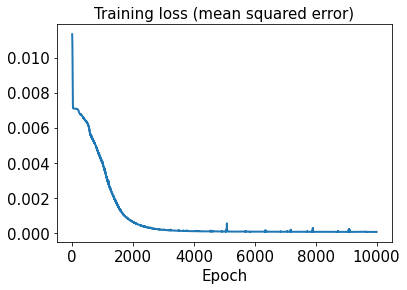

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

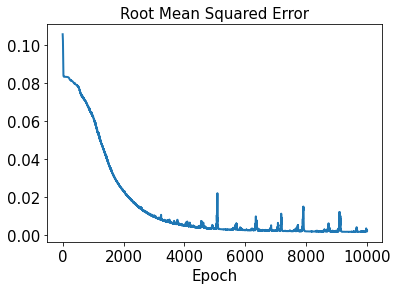

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

2/2 [==============================] - 0s 3ms/step - loss: 4.8702e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00031965325


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.043141972


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00026073252, 0.00044001607, 0.00024183078, 0.00016098643, 0.00025615495, 0.0005924571, 0.00028821314, 0.0002213626, 0.0001327198, 0.00032878263, 0.00025541897, 0.00019919885, 0.00045657763, 0.0003377643, 0.0002280865, 0.000501387, 0.0002632623, 0.0002393651, 0.00032369548, 0.0006295438, 0.00025746052, 0.00043176344, 0.0003745654, 0.0005724177, 0.00040524328, 0.00029652863, 0.0002836967, 0.00021627136, 0.0003413146, 0.00034400926, 0.00016276313, 0.00013070625, 0.0006793532, 0.00020092048, 0.00026230843, 0.00024009928, 0.0006101977, 6.516401e-05, 0.00027840218, 0.00026542816, 0.0006466686, 0.0002750082, 0.00078007375, 0.0002014145, 0.00018551781, 0.00012461054, 0.0002615639, 0.00061822654, 0.00037488298, 0.00037869465, 0.00021309618, 0.00022660589, 0.00045071443, 0.00020325684]


In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.050867107, 0.16224201, 0.12598915, 0.09000962, 0.020072034, 0.15398908, 0.028837368, 0.0076573915, 0.0025189875, 0.015270145, 0.0060640736, 0.0024956241, 0.0018422621, 0.040211182, 0.0019698278, 0.0029351725, 0.029111737, 0.0045784907, 0.018960623, 0.015377564, 0.06121394, 0.14595303, 0.01353318, 0.03819935]


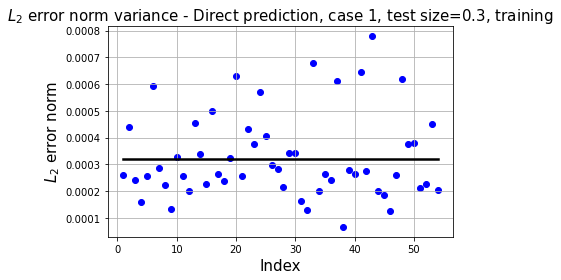

In [42]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 1, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

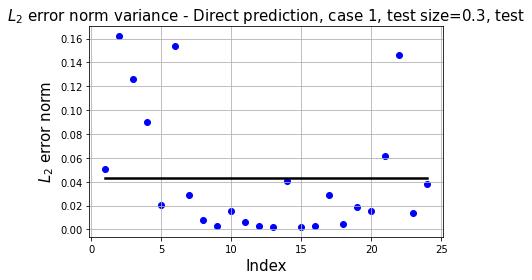

In [43]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 1, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

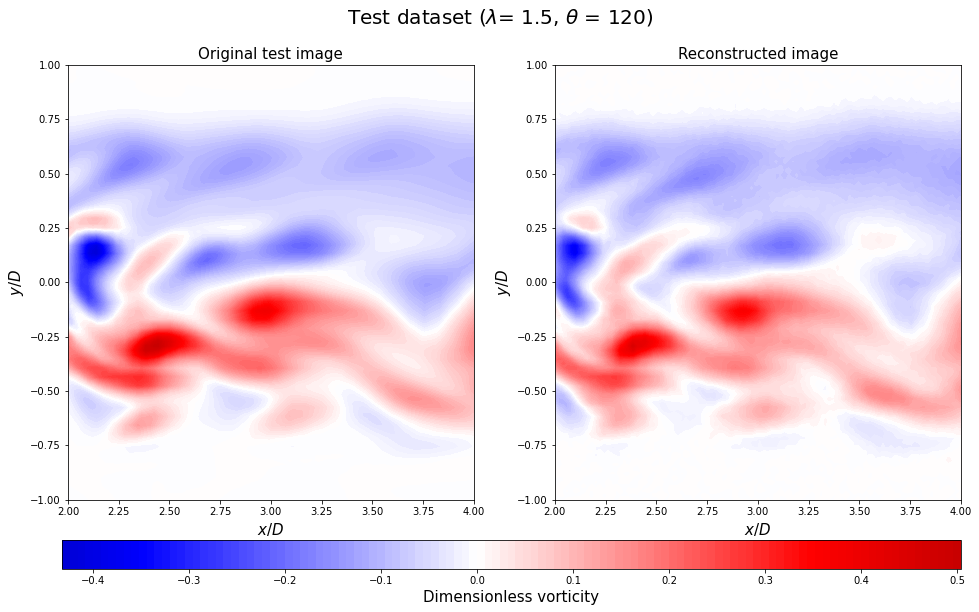

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

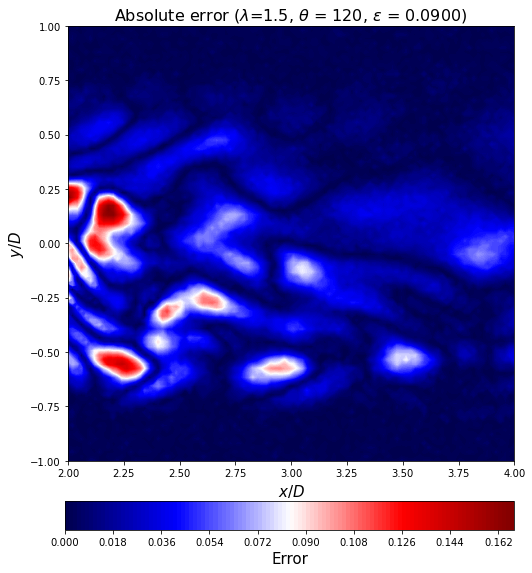

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()